```
Name : Vishal Kumar Pal
Seat Number : 23258851
```

## ADS_LAB_1 – Working of hash function()

#### Q.1 Demonstrate the working of Hash function for the following data: Integer, float, character, string, tuple, list

#### Q.2 Take a number list and check the hash index assigned to the set of values of the list.

#### Q.3 Take any expression of your choice (e.g. hello world), and find the hash value assigned to the expression using ord()function used to get the ordinal value of any character.

#### Q.4 Demonstrate that Mutable objects like lists, dictionaries, and sets cannot be hashed with the hash() function.

In [ ]:
# Integer
integer_val = 42
print(f"Hash of integer {integer_val}: {hash(integer_val)}")

# Float
float_val = 3.14
print(f"Hash of float {float_val}: {hash(float_val)}")

# Character (as a string of length 1)
char_val = 'A'
print(f"Hash of character '{char_val}': {hash(char_val)}")

# String
string_val = "Hello"
print(f"Hash of string '{string_val}': {hash(string_val)}")

# Tuple (immutable)
tuple_val = (1, 2, 3)
print(f"Hash of tuple {tuple_val}: {hash(tuple_val)}")

# List (mutable, will raise TypeError)
try:
    list_val = [1, 2, 3]
    hash(list_val)
except TypeError as e:
    print(f"Hash of list {list_val}: Cannot hash, {e}")

Hash of integer 42: 42
Hash of float 3.14: 322818021289917443
Hash of character 'A': -3755978337357082932
Hash of string 'Hello': -7139200451153516628
Hash of tuple (1, 2, 3): 529344067295497451
Hash of list [1, 2, 3]: Cannot hash, unhashable type: 'list'


In [ ]:
# Number list
num_list = [1, 2, 3, 4, 5]

# Convert to a set (if elements are unique and hashable)
num_set = set(num_list)
print(f"Set from list {num_list}: {num_set}")
print(f"Hash of set {num_set}: {hash(frozenset(num_set))}")

# Convert to a tuple (since lists are unhashable)
num_tuple = tuple(num_list)
print(f"Tuple from list {num_list}: {num_tuple}")
print(f"Hash of tuple {num_tuple}: {hash(num_tuple)}")

Set from list [1, 2, 3, 4, 5]: {1, 2, 3, 4, 5}
Hash of set {1, 2, 3, 4, 5}: -3779889356588604112
Tuple from list [1, 2, 3, 4, 5]: (1, 2, 3, 4, 5)
Hash of tuple (1, 2, 3, 4, 5): -5659871693760987716


In [ ]:
expression = "hello world"

# Custom hash using ord()
custom_hash = sum(ord(char) for char in expression)
print(f"Expression: '{expression}'")
print(f"Custom hash (sum of ordinals): {custom_hash}")

# Python's built-in hash for comparison
builtin_hash = hash(expression)
print(f"Built-in hash: {builtin_hash}")

# Show ordinal values for clarity
print("Ordinal values of characters:")
for char in expression:
    print(f"Character '{char}': ord({char}) = {ord(char)}")

Expression: 'hello world'
Custom hash (sum of ordinals): 1116
Built-in hash: 6406814827954504846
Ordinal values of characters:
Character 'h': ord(h) = 104
Character 'e': ord(e) = 101
Character 'l': ord(l) = 108
Character 'l': ord(l) = 108
Character 'o': ord(o) = 111
Character ' ': ord( ) = 32
Character 'w': ord(w) = 119
Character 'o': ord(o) = 111
Character 'r': ord(r) = 114
Character 'l': ord(l) = 108
Character 'd': ord(d) = 100


In [ ]:
# List
try:
    my_list = [1, 2, 3]
    hash(my_list)
except TypeError as e:
    print(f"Trying to hash list {my_list}: {e}")

# Dictionary
try:
    my_dict = {'a': 1, 'b': 2}
    hash(my_dict)
except TypeError as e:
    print(f"Trying to hash dictionary {my_dict}: {e}")

# Set
try:
    my_set = {1, 2, 3}
    hash(my_set)
except TypeError as e:
    print(f"Trying to hash set {my_set}: {e}")

# Contrast with immutable frozenset
my_frozenset = frozenset([1, 2, 3])
print(f"Hash of frozenset {my_frozenset}: {hash(my_frozenset)}")

Trying to hash list [1, 2, 3]: unhashable type: 'list'
Trying to hash dictionary {'a': 1, 'b': 2}: unhashable type: 'dict'
Trying to hash set {1, 2, 3}: unhashable type: 'set'
Hash of frozenset frozenset({1, 2, 3}): -272375401224217160


## ADS_LAB_2 – Generation of Hash Tables and Open Addressing Collision Resolution

#### Q.1 Write and execute the Python code to create a (i) Simple Hash Table (ii) Hash Table with Collision.
#### Q. 2 Create a Hash Table with Collision and Demonstrate following different Open Addressing types Collision Handling Technique

1.   Probing :
  * Linear Probing
  * Quadratic Probing
2.   Double Hashing


In [ ]:
class SimpleHashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self.hash_function(key)
        self.table[index] = (key, value)

    def search(self, key):
        index = self.hash_function(key)
        if self.table[index] and self.table[index][0] == key:
            return self.table[index][1]
        return None

    def display(self):
        for i, slot in enumerate(self.table):
            print(f"Index {i}: {slot}")

# Example usage
if __name__ == "__main__":
    ht = SimpleHashTable(10)
    ht.insert("apple", 5)
    ht.insert("banana", 8)
    ht.insert("orange", 3)
    print("Simple Hash Table:")
    ht.display()
    print(f"Search 'apple': {ht.search('apple')}")
    print(f"Search 'grape': {ht.search('grape')}")

Simple Hash Table:
Index 0: ('apple', 5)
Index 1: ('orange', 3)
Index 2: None
Index 3: None
Index 4: ('banana', 8)
Index 5: None
Index 6: None
Index 7: None
Index 8: None
Index 9: None
Search 'apple': 5
Search 'grape': None


In [ ]:
class HashTableWithCollision:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self.hash_function(key)
        # Check if key already exists
        for item in self.table[index]:
            if item[0] == key:
                item[1] = value  # Update value
                return
        self.table[index].append([key, value])

    def search(self, key):
        index = self.hash_function(key)
        for item in self.table[index]:
            if item[0] == key:
                return item[1]
        return None

    def display(self):
        for i, slot in enumerate(self.table):
            print(f"Index {i}: {slot}")

# Example usage with intentional collisions
if __name__ == "__main__":
    ht = HashTableWithCollision(5)  # Small size to force collisions
    ht.insert("apple", 5)
    ht.insert("banana", 8)
    ht.insert("app", 10)  # Likely collides with "apple"
    ht.insert("ban", 12)  # Likely collides with "banana"
    print("Hash Table with Collisions (Chaining):")
    ht.display()
    print(f"Search 'apple': {ht.search('apple')}")
    print(f"Search 'app': {ht.search('app')}")

Hash Table with Collisions (Chaining):
Index 0: [['apple', 5]]
Index 1: []
Index 2: [['app', 10]]
Index 3: []
Index 4: [['banana', 8], ['ban', 12]]
Search 'apple': 5
Search 'app': 10


In [ ]:
class HashTableOpenAddressing:
    def __init__(self, size, probe_type="linear"):
        self.size = size
        self.table = [None] * size
        self.probe_type = probe_type
        self.count = 0  # Track number of elements

    def hash_function(self, key):
        return hash(key) % self.size

    def hash2(self, key):
        # Second hash function for double hashing
        return 1 + (hash(key) % (self.size - 1))

    def probe(self, key, i):
        h1 = self.hash_function(key)
        if self.probe_type == "linear":
            return (h1 + i) % self.size
        elif self.probe_type == "quadratic":
            return (h1 + i * i) % self.size
        elif self.probe_type == "double":
            h2 = self.hash2(key)
            return (h1 + i * h2) % self.size
        else:
            raise ValueError("Unknown probe type")

    def insert(self, key, value):
        if self.count >= self.size:
            raise Exception("Hash table is full")
        i = 0
        while True:
            index = self.probe(key, i)
            if self.table[index] is None:
                self.table[index] = (key, value)
                self.count += 1
                return
            elif self.table[index][0] == key:
                self.table[index] = (key, value)  # Update value
                return
            i += 1
            if i >= self.size:
                raise Exception("No available slot")

    def search(self, key):
        i = 0
        while i < self.size:
            index = self.probe(key, i)
            if self.table[index] is None:
                return None
            elif self.table[index][0] == key:
                return self.table[index][1]
            i += 1
        return None

    def display(self):
        for i, slot in enumerate(self.table):
            print(f"Index {i}: {slot}")

# Example usage for all probing types
if __name__ == "__main__":
    # Small size to force collisions
    keys = ["apple", "app", "banana", "ban", "orange"]

    print("--- Linear Probing ---")
    ht_linear = HashTableOpenAddressing(5, "linear")
    for key in keys:
        ht_linear.insert(key, len(key))
    ht_linear.display()
    print(f"Search 'apple': {ht_linear.search('apple')}")

    print("\n--- Quadratic Probing ---")
    ht_quadratic = HashTableOpenAddressing(5, "quadratic")
    for key in keys:
        ht_quadratic.insert(key, len(key))
    ht_quadratic.display()
    print(f"Search 'apple': {ht_quadratic.search('apple')}")

    print("\n--- Double Hashing ---")
    ht_double = HashTableOpenAddressing(5, "double")
    for key in keys:
        ht_double.insert(key, len(key))
    ht_double.display()
    print(f"Search 'apple': {ht_double.search('apple')}")

--- Linear Probing ---
Index 0: ('apple', 5)
Index 1: ('ban', 3)
Index 2: ('app', 3)
Index 3: ('orange', 6)
Index 4: ('banana', 6)
Search 'apple': 5

--- Quadratic Probing ---
Index 0: ('apple', 5)
Index 1: ('orange', 6)
Index 2: ('app', 3)
Index 3: ('ban', 3)
Index 4: ('banana', 6)
Search 'apple': 5

--- Double Hashing ---
Index 0: ('apple', 5)
Index 1: ('orange', 6)
Index 2: ('app', 3)
Index 3: ('ban', 3)
Index 4: ('banana', 6)
Search 'apple': 5


## ADS_LAB_3 – Separate Chaining for Collision Handling in Hash Tables
Q.1 Create a Hash Table with Collision and Demonstrate how Separate Chaining is used for Collision
Handling.

In [ ]:
# Node class for the linked list used in separate chaining
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

# Hash Table class implementing separate chaining
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size  # Initialize table with empty slots

    # Hash function to compute index
    def _hash_function(self, key):
        return hash(key) % self.size

    # Insert a key-value pair into the hash table
    def insert(self, key, value):
        index = self._hash_function(key)
        # If no node exists at the index, create a new node
        if self.table[index] is None:
            self.table[index] = Node(key, value)
        else:
            # Collision: Traverse the linked list at the index
            current = self.table[index]
            # If key already exists, update the value
            while current:
                if current.key == key:
                    current.value = value
                    return
                if current.next is None:
                    break
                current = current.next
            # Add new node at the end of the linked list
            current.next = Node(key, value)

    # Search for a value by key
    def search(self, key):
        index = self._hash_function(key)
        current = self.table[index]
        # Traverse the linked list to find the key
        while current:
            if current.key == key:
                return current.value
            current = current.next
        return None  # Key not found

    # Delete a key-value pair from the hash table
    def delete(self, key):
        index = self._hash_function(key)
        current = self.table[index]
        # If the bucket is empty
        if current is None:
            return False
        # If the key is at the head of the linked list
        if current.key == key:
            self.table[index] = current.next
            return True
        # Traverse the linked list to find and remove the key
        while current.next:
            if current.next.key == key:
                current.next = current.next.next
                return True
            current = current.next
        return False  # Key not found

    # Display the hash table
    def display(self):
        for i in range(self.size):
            print(f"Bucket {i}: ", end="")
            current = self.table[i]
            while current:
                print(f"({current.key}, {current.value}) -> ", end="")
                current = current.next
            print("None")

# Demonstration of the Hash Table with Separate Chaining
def demonstrate_hash_table():
    # Create a hash table of size 5
    ht = HashTable(5)

    # Insert key-value pairs (some will cause collisions)
    print("Inserting key-value pairs:")
    ht.insert("apple", 10)
    ht.insert("banana", 20)
    ht.insert("grape", 30)
    ht.insert("orange", 40)
    ht.insert("kiwi", 50)  # Potential collision depending on hash
    ht.display()

    # Search for values
    print("\nSearching for keys:")
    print("Value for 'apple':", ht.search("apple"))
    print("Value for 'banana':", ht.search("banana"))
    print("Value for 'missing':", ht.search("missing"))

    # Delete a key
    print("\nDeleting 'banana':")
    ht.delete("banana")
    ht.display()

    # Insert a new key to show collision handling
    print("\nInserting new key 'mango' (may cause collision):")
    ht.insert("mango", 60)
    ht.display()

if __name__ == "__main__":
    demonstrate_hash_table()

Inserting key-value pairs:
Bucket 0: (apple, 10) -> None
Bucket 1: (orange, 40) -> None
Bucket 2: None
Bucket 3: None
Bucket 4: (banana, 20) -> (grape, 30) -> (kiwi, 50) -> None

Searching for keys:
Value for 'apple': 10
Value for 'banana': 20
Value for 'missing': None

Deleting 'banana':
Bucket 0: (apple, 10) -> None
Bucket 1: (orange, 40) -> None
Bucket 2: None
Bucket 3: None
Bucket 4: (grape, 30) -> (kiwi, 50) -> None

Inserting new key 'mango' (may cause collision):
Bucket 0: (apple, 10) -> None
Bucket 1: (orange, 40) -> None
Bucket 2: (mango, 60) -> None
Bucket 3: None
Bucket 4: (grape, 30) -> (kiwi, 50) -> None


## ADS_LAB_4 – Rehashing and Universal Hashing
Q.1 Create a Hash Table and Demonstrate how the following Hashing Techniques are performed
1. Rehashing
2. Universal Hashing

In [1]:
import random

# Node class for linked list (for separate chaining in case of collisions)
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

# Hash Table class with Rehashing and Universal Hashing
class HashTable:
    def __init__(self, size, load_factor_threshold=0.75):
        self.size = size
        self.table = [None] * size
        self.num_items = 0
        self.load_factor_threshold = load_factor_threshold
        # Universal hashing parameters
        self.p = 104729  # A large prime number
        self.a = random.randint(1, self.p - 1)  # Random a for universal hashing
        self.b = random.randint(0, self.p - 1)  # Random b for universal hashing

    # Universal hash function: h(k) = ((a*k + b) mod p) mod m
    def _hash_function(self, key):
        key_hash = hash(key)  # Use Python's hash for simplicity
        return ((self.a * key_hash + self.b) % self.p) % self.size

    # Compute load factor
    def _load_factor(self):
        return self.num_items / self.size

    # Rehashing: Resize the table and reinsert all items
    def _rehash(self):
        old_table = self.table
        self.size = self.size * 2  # Double the size
        self.table = [None] * self.size
        self.num_items = 0
        # Re-randomize universal hashing parameters
        self.a = random.randint(1, self.p - 1)
        self.b = random.randint(0, self.p - 1)
        # Reinsert all items from the old table
        for bucket in old_table:
            current = bucket
            while current:
                self.insert(current.key, current.value)
                current = current.next

    # Insert a key-value pair
    def insert(self, key, value):
        # Check if rehashing is needed
        if self._load_factor() >= self.load_factor_threshold:
            print(f"Load factor {self._load_factor():.2f} exceeds threshold {self.load_factor_threshold}. Triggering rehashing...")
            self._rehash()

        index = self._hash_function(key)
        if self.table[index] is None:
            self.table[index] = Node(key, value)
            self.num_items += 1
        else:
            # Handle collision with separate chaining
            current = self.table[index]
            while current:
                if current.key == key:
                    current.value = value  # Update value if key exists
                    return
                if current.next is None:
                    break
                current = current.next
            current.next = Node(key, value)
            self.num_items += 1

    # Search for a value by key
    def search(self, key):
        index = self._hash_function(key)
        current = self.table[index]
        while current:
            if current.key == key:
                return current.value
            current = current.next
        return None

    # Display the hash table
    def display(self):
        print(f"Hash Table (size={self.size}, items={self.num_items}, load factor={self._load_factor():.2f}):")
        for i in range(self.size):
            print(f"Bucket {i}: ", end="")
            current = self.table[i]
            while current:
                print(f"({current.key}, {current.value}) -> ", end="")
                current = current.next
            print("None")

# Demonstration of Rehashing and Universal Hashing
def demonstrate_hash_table():
    # Create a hash table with size 4 and load factor threshold 0.75
    ht = HashTable(4, load_factor_threshold=0.75)

    print("Demonstrating Universal Hashing and Rehashing:")
    print(f"Initial universal hash parameters: a={ht.a}, b={ht.b}")

    # Insert key-value pairs to trigger collisions and rehashing
    print("\nInserting key-value pairs:")
    pairs = [("apple", 10), ("banana", 20), ("grape", 30), ("orange", 40), ("kiwi", 50)]
    for key, value in pairs:
        print(f"\nInserting ({key}, {value})")
        ht.insert(key, value)
        ht.display()

    # Search for values
    print("\nSearching for keys:")
    print("Value for 'apple':", ht.search("apple"))
    print("Value for 'missing':", ht.search("missing"))

if __name__ == "__main__":
    demonstrate_hash_table()

Demonstrating Universal Hashing and Rehashing:
Initial universal hash parameters: a=53891, b=75534

Inserting key-value pairs:

Inserting (apple, 10)
Hash Table (size=4, items=1, load factor=0.25):
Bucket 0: None
Bucket 1: None
Bucket 2: (apple, 10) -> None
Bucket 3: None

Inserting (banana, 20)
Hash Table (size=4, items=2, load factor=0.50):
Bucket 0: None
Bucket 1: (banana, 20) -> None
Bucket 2: (apple, 10) -> None
Bucket 3: None

Inserting (grape, 30)
Hash Table (size=4, items=3, load factor=0.75):
Bucket 0: None
Bucket 1: (banana, 20) -> None
Bucket 2: (apple, 10) -> None
Bucket 3: (grape, 30) -> None

Inserting (orange, 40)
Load factor 0.75 exceeds threshold 0.75. Triggering rehashing...
Hash Table (size=8, items=4, load factor=0.50):
Bucket 0: None
Bucket 1: (grape, 30) -> None
Bucket 2: (orange, 40) -> None
Bucket 3: None
Bucket 4: (apple, 10) -> None
Bucket 5: None
Bucket 6: None
Bucket 7: (banana, 20) -> None

Inserting (kiwi, 50)
Hash Table (size=8, items=5, load factor=0.62)

## ADS_LAB_5 – Max_Heap, Binary_Heap, Priority Queue, Binomial Queue
Q.1 Demonstrate the working of the following


1.   Max_Heap
2.   Binay Heap
3.   Priority Queue
4.   Binomial Queue

In [3]:
# Max Heap and Binary Heap Implementation
class MaxHeap:
    def __init__(self):
        self.heap = []  # Binary heap stored as a list

    def parent(self, i):
        return (i - 1) // 2

    def left_child(self, i):
        return 2 * i + 1

    def right_child(self, i):
        return 2 * i + 2

    def _heapify_up(self, i):
        parent = self.parent(i)
        if i > 0 and self.heap[i] > self.heap[parent]:
            self.heap[i], self.heap[parent] = self.heap[parent], self.heap[i]
            self._heapify_up(parent)

    def _heapify_down(self, i):
        max_index = i
        left = self.left_child(i)
        right = self.right_child(i)
        if left < len(self.heap) and self.heap[left] > self.heap[max_index]:
            max_index = left
        if right < len(self.heap) and self.heap[right] > self.heap[max_index]:
            max_index = right
        if max_index != i:
            self.heap[i], self.heap[max_index] = self.heap[max_index], self.heap[i]
            self._heapify_down(max_index)

    def insert(self, value):
        self.heap.append(value)
        self._heapify_up(len(self.heap) - 1)

    def extract_max(self):
        if not self.heap:
            return None
        max_val = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        if self.heap:
            self._heapify_down(0)
        return max_val

    def display(self):
        print("Max Heap:", self.heap)

# Priority Queue using Max Heap
class PriorityQueue:
    def __init__(self):
        self.max_heap = MaxHeap()

    def enqueue(self, value):
        self.max_heap.insert(value)

    def dequeue(self):
        return self.max_heap.extract_max()

    def display(self):
        self.max_heap.display()

# Binomial Queue Node
class BinomialNode:
    def __init__(self, value):
        self.value = value
        self.children = []
        self.order = 0  # Number of children

# Binomial Queue Implementation
class BinomialQueue:
    def __init__(self):
        self.trees = []  # List of binomial trees

    def _merge_trees(self, t1, t2):
        if t1.value < t2.value:
            t1, t2 = t2, t1
        t1.children.append(t2)
        t1.order += 1
        return t1

    def merge(self, other):
        result = BinomialQueue()
        i, j = 0, 0
        carry = None
        while i < len(self.trees) or j < len(other.trees) or carry:
            t1 = self.trees[i] if i < len(self.trees) else None
            t2 = other.trees[j] if j < len(other.trees) else None
            if carry:
                if t1 and t1.order == carry.order:
                    carry = self._merge_trees(t1, carry)
                    i += 1
                elif t2 and t2.order == carry.order:
                    carry = self._merge_trees(t2, carry)
                    j += 1
                else:
                    result.trees.append(carry)
                    carry = None
            elif t1 and t2 and t1.order == t2.order:
                carry = self._merge_trees(t1, t2)
                i += 1
                j += 1
            elif t1 and (not t2 or t1.order < t2.order):
                result.trees.append(t1)
                i += 1
            elif t2:
                result.trees.append(t2)
                j += 1
        return result

    def insert(self, value):
        new_queue = BinomialQueue()
        new_queue.trees.append(BinomialNode(value))
        merged = self.merge(new_queue)
        self.trees = merged.trees

    def find_max(self):
        if not self.trees:
            return None
        max_val = self.trees[0].value
        for tree in self.trees:
            if tree.value > max_val:
                max_val = tree.value
        return max_val

    def extract_max(self):
        if not self.trees:
            return None
        max_idx = 0
        max_val = self.trees[0].value
        for i, tree in enumerate(self.trees):
            if tree.value > max_val:
                max_val = tree.value
                max_idx = i
        max_tree = self.trees.pop(max_idx)
        new_queue = BinomialQueue()
        new_queue.trees = max_tree.children
        merged = self.merge(new_queue)
        self.trees = merged.trees
        return max_val

    def display(self):
        print("Binomial Queue Trees:")
        for i, tree in enumerate(self.trees):
            print(f"Tree {i} (order {tree.order}): ", end="")
            self._display_tree(tree)
            print()

    def _display_tree(self, node, level=0):
        print(f"{'  ' * level}{node.value} (order {node.order})", end="")
        for child in node.children:
            print(" -> ", end="")
            self._display_tree(child, level + 1)

# Demonstration of Max Heap, Binary Heap, Priority Queue, and Binomial Queue
def demonstrate_structures():
    # (1) Max Heap and (2) Binary Heap Demonstration
    print("=== Max Heap (Binary Heap) Demonstration ===")
    max_heap = MaxHeap()
    print("Inserting values: 10, 20, 5, 30, 15")
    for value in [10, 20, 5, 30, 15]:
        max_heap.insert(value)
        max_heap.display()
    print("\nExtracting max values:")
    for _ in range(3):
        print(f"Extracted max: {max_heap.extract_max()}")
        max_heap.display()

    # (3) Priority Queue Demonstration
    print("\n=== Priority Queue Demonstration ===")
    pq = PriorityQueue()
    print("Enqueuing values: 50, 40, 60, 20")
    for value in [50, 40, 60, 20]:
        pq.enqueue(value)
        pq.display()
    print("\nDequeuing values:")
    for _ in range(3):
        print(f"Dequeued: {pq.dequeue()}")
        pq.display()

    # (4) Binomial Queue Demonstration
    print("\n=== Binomial Queue Demonstration ===")
    bq = BinomialQueue()
    print("Inserting values: 10, 20, 5, 30, 15")
    for value in [10, 20, 5, 30, 15]:  # Fixed the list here
        bq.insert(value)
        bq.display()
    print("\nFinding max:", bq.find_max())
    print("Extracting max:", bq.extract_max())
    bq.display()

if __name__ == "__main__":
    demonstrate_structures()

=== Max Heap (Binary Heap) Demonstration ===
Inserting values: 10, 20, 5, 30, 15
Max Heap: [10]
Max Heap: [20, 10]
Max Heap: [20, 10, 5]
Max Heap: [30, 20, 5, 10]
Max Heap: [30, 20, 5, 10, 15]

Extracting max values:
Extracted max: 30
Max Heap: [20, 15, 5, 10]
Extracted max: 20
Max Heap: [15, 10, 5]
Extracted max: 15
Max Heap: [10, 5]

=== Priority Queue Demonstration ===
Enqueuing values: 50, 40, 60, 20
Max Heap: [50]
Max Heap: [50, 40]
Max Heap: [60, 40, 50]
Max Heap: [60, 40, 50, 20]

Dequeuing values:
Dequeued: 60
Max Heap: [50, 40, 20]
Dequeued: 50
Max Heap: [40, 20]
Dequeued: 40
Max Heap: [20]

=== Binomial Queue Demonstration ===
Inserting values: 10, 20, 5, 30, 15
Binomial Queue Trees:
Tree 0 (order 0): 10 (order 0)
Binomial Queue Trees:
Tree 0 (order 1): 20 (order 1) ->   10 (order 0)
Binomial Queue Trees:
Tree 0 (order 0): 5 (order 0)
Tree 1 (order 1): 20 (order 1) ->   10 (order 0)
Binomial Queue Trees:
Tree 0 (order 2): 30 (order 2) ->   5 (order 0) ->   20 (order 1) ->    

## ADS_LAB_6_0 – Graphing Algorithms – Drawing Graphs






####1.1 Create and draw a simple undirected graph, G(V, E) with set of nodes V= {1,2,3,4,5} and set of edges E={ (1, 2), (2, 3), (1, 3), (3, 4), (1, 4), (1, 5)} and add some more nodes and edges in the graph G and draw and find



1.   Total no. of nodes.
2.   Total no. of edges.
3.   List of all nodes.
4.   Degree of all nodes.
5.   List of all edges.
6.   List of all nodes from a vertex '2'.
7.   Adjacency List for the Graph G

Drawing initial graph G:


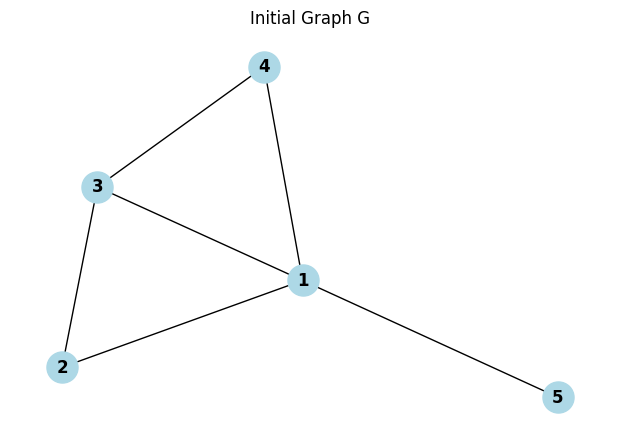


Drawing updated graph G after adding nodes {6, 7} and edges {(2,6), (6,7), (4,7)}:


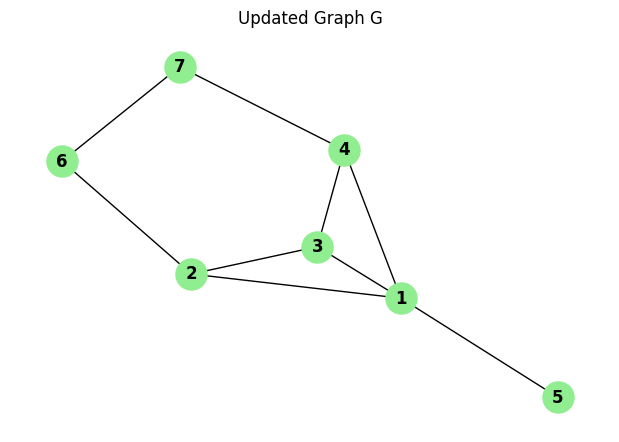


Graph Analysis:
(i) Total number of nodes: 7
(ii) Total number of edges: 9
(iii) List of all nodes: [1, 2, 3, 4, 5, 6, 7]
(iv) Degree of all nodes:
    Node 1: 4
    Node 2: 3
    Node 3: 3
    Node 4: 3
    Node 5: 1
    Node 6: 2
    Node 7: 2
(v) List of all edges: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 6), (3, 4), (4, 7), (6, 7)]
(vi) List of all nodes from vertex 2: [1, 3, 6]
(vii) Adjacency List for Graph G:
    Node 1: [2, 3, 4, 5]
    Node 2: [1, 3, 6]
    Node 3: [1, 2, 4]
    Node 4: [1, 3, 7]
    Node 5: [1]
    Node 6: [2, 7]
    Node 7: [4, 6]


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create and draw the undirected graph
def demonstrate_graph():
    # Create graph G with initial nodes and edges
    G = nx.Graph()
    nodes = [1, 2, 3, 4, 5]
    edges = [(1, 2), (2, 3), (1, 3), (3, 4), (1, 4), (1, 5)]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    # Draw initial graph
    print("Drawing initial graph G:")
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold')
    plt.title("Initial Graph G")
    plt.show()

    # Add more nodes and edges
    new_nodes = [6, 7]
    new_edges = [(2, 6), (6, 7), (4, 7)]
    G.add_nodes_from(new_nodes)
    G.add_edges_from(new_edges)

    # Draw updated graph
    print("\nDrawing updated graph G after adding nodes {6, 7} and edges {(2,6), (6,7), (4,7)}:")
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='lightgreen', node_size=500, font_size=12, font_weight='bold')
    plt.title("Updated Graph G")
    plt.show()

    # Compute and display required information
    print("\nGraph Analysis:")
    print(f"(i) Total number of nodes: {G.number_of_nodes()}")
    print(f"(ii) Total number of edges: {G.number_of_edges()}")
    print(f"(iii) List of all nodes: {sorted(list(G.nodes()))}")

    print("(iv) Degree of all nodes:")
    for node in sorted(G.nodes()):
        print(f"    Node {node}: {G.degree[node]}")

    print("(v) List of all edges:", sorted(G.edges()))
    print("(vi) List of all nodes from vertex 2:", sorted(list(G.neighbors(2))))

    print("(vii) Adjacency List for Graph G:")
    for node in sorted(G.nodes()):
        print(f"    Node {node}: {sorted(list(G.neighbors(node)))}")

if __name__ == "__main__":
    demonstrate_graph()

#### 1.2 Create and draw a simple directed graph, G (V, E) with set of nodes V= {1,2,3,4,5} and set of edges E={ (1, 2), (2, 3), (1, 3), (3, 4), (1, 4), (1, 5)} and add some more nodes and edges in the graph G and find


1.   Total no. of nodes.
2.   Total no. of edges.
3.   List of all nodes.
4.   Degree of all nodes.
5.   List of all edges.
6.   List of all nodes from a vertex '2'.
7.   Adjacency List for the Graph G










Drawing initial directed graph G:


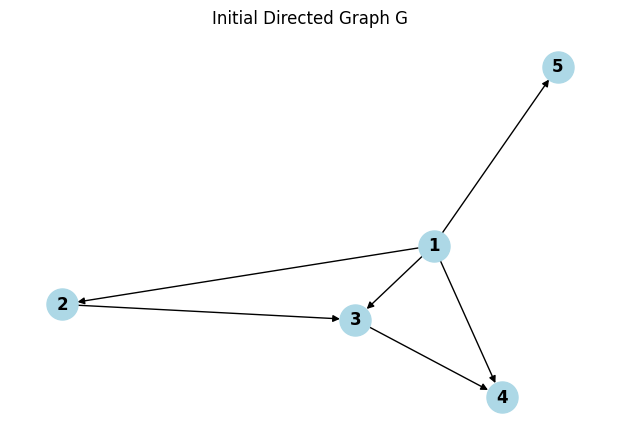


Drawing updated directed graph G after adding nodes {6, 7} and edges {(2,6), (6,7), (4,7)}:


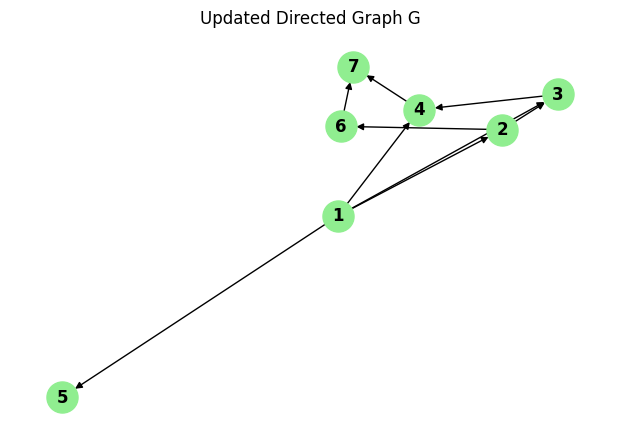


Graph Analysis:
(i) Total number of nodes: 7
(ii) Total number of edges: 9
(iii) List of all nodes: [1, 2, 3, 4, 5, 6, 7]
(iv) Degree of all nodes (in-degree, out-degree):
    Node 1: in-degree=0, out-degree=4
    Node 2: in-degree=1, out-degree=2
    Node 3: in-degree=2, out-degree=1
    Node 4: in-degree=2, out-degree=1
    Node 5: in-degree=1, out-degree=0
    Node 6: in-degree=1, out-degree=1
    Node 7: in-degree=2, out-degree=0
(v) List of all edges: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 6), (3, 4), (4, 7), (6, 7)]
(vi) List of all nodes from vertex 2 (outgoing neighbors): [3, 6]
(vii) Adjacency List for Graph G (outgoing edges):
    Node 1: [2, 3, 4, 5]
    Node 2: [3, 6]
    Node 3: [4]
    Node 4: [7]
    Node 5: []
    Node 6: [7]
    Node 7: []


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create and draw the directed graph
def demonstrate_directed_graph():
    # Create directed graph G with initial nodes and edges
    G = nx.DiGraph()
    nodes = [1, 2, 3, 4, 5]
    edges = [(1, 2), (2, 3), (1, 3), (3, 4), (1, 4), (1, 5)]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    # Draw initial graph
    print("Drawing initial directed graph G:")
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold', arrows=True)
    plt.title("Initial Directed Graph G")
    plt.show()

    # Add more nodes and edges
    new_nodes = [6, 7]
    new_edges = [(2, 6), (6, 7), (4, 7)]
    G.add_nodes_from(new_nodes)
    G.add_edges_from(new_edges)

    # Draw updated graph
    print("\nDrawing updated directed graph G after adding nodes {6, 7} and edges {(2,6), (6,7), (4,7)}:")
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='lightgreen', node_size=500, font_size=12, font_weight='bold', arrows=True)
    plt.title("Updated Directed Graph G")
    plt.show()

    # Compute and display required information
    print("\nGraph Analysis:")
    print(f"(i) Total number of nodes: {G.number_of_nodes()}")
    print(f"(ii) Total number of edges: {G.number_of_edges()}")
    print(f"(iii) List of all nodes: {sorted(list(G.nodes()))}")

    print("(iv) Degree of all nodes (in-degree, out-degree):")
    for node in sorted(G.nodes()):
        print(f"    Node {node}: in-degree={G.in_degree(node)}, out-degree={G.out_degree(node)}")

    print("(v) List of all edges:", sorted(G.edges()))
    print("(vi) List of all nodes from vertex 2 (outgoing neighbors):", sorted(list(G.successors(2))))

    print("(vii) Adjacency List for Graph G (outgoing edges):")
    for node in sorted(G.nodes()):
        print(f"    Node {node}: {sorted(list(G.successors(node)))}")

if __name__ == "__main__":
    demonstrate_directed_graph()

#### 1.3 Create and draw a weighted undirected graph with labeled nodes and weighted edges, by adding two or more edges with weights at the same time and find


1.   Total no. of nodes.
2.   Total no. of edges.
3.   List of all nodes.
4.   Degree of all nodes.
5.   List of all edges.
6.   List of all nodes from a vertex '2'.
7.   Adjacency List for the Graph G

Drawing initial weighted undirected graph G:


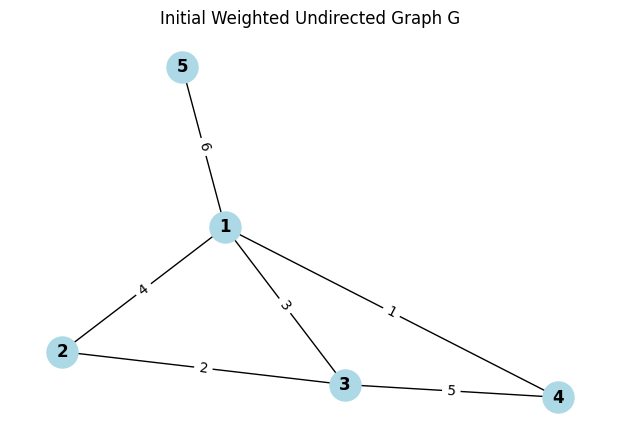


Drawing updated weighted undirected graph G after adding nodes {6, 7} and edges {(2,6,7), (6,7,3), (4,7,2)}:


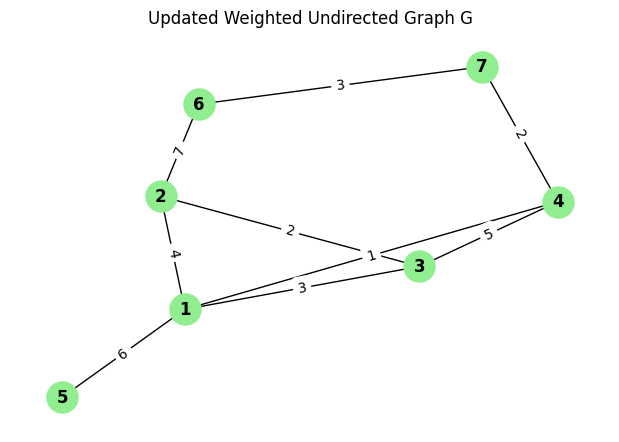


Graph Analysis:
(i) Total number of nodes: 7
(ii) Total number of edges: 9
(iii) List of all nodes: [1, 2, 3, 4, 5, 6, 7]
(iv) Degree of all nodes:
    Node 1: 4
    Node 2: 3
    Node 3: 3
    Node 4: 3
    Node 5: 1
    Node 6: 2
    Node 7: 2
(v) List of all edges with weights:
    (1, 2, 4)
    (1, 3, 3)
    (1, 4, 1)
    (1, 5, 6)
    (2, 3, 2)
    (2, 6, 7)
    (3, 4, 5)
    (4, 7, 2)
    (6, 7, 3)
(vi) List of all nodes from vertex 2: [1, 3, 6]
(vii) Adjacency List for Graph G:
    Node 1: [(2, 4), (3, 3), (4, 1), (5, 6)]
    Node 2: [(1, 4), (3, 2), (6, 7)]
    Node 3: [(1, 3), (2, 2), (4, 5)]
    Node 4: [(1, 1), (3, 5), (7, 2)]
    Node 5: [(1, 6)]
    Node 6: [(2, 7), (7, 3)]
    Node 7: [(4, 2), (6, 3)]


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create and draw the weighted undirected graph
def demonstrate_weighted_graph():
    # Create weighted undirected graph G with initial nodes and edges
    G = nx.Graph()
    nodes = [1, 2, 3, 4, 5]
    # Initial edges with weights
    edges = [(1, 2, {'weight': 4}), (2, 3, {'weight': 2}), (1, 3, {'weight': 3}),
             (3, 4, {'weight': 5}), (1, 4, {'weight': 1}), (1, 5, {'weight': 6})]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    # Draw initial graph
    print("Drawing initial weighted undirected graph G:")
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Initial Weighted Undirected Graph G")
    plt.show()

    # Add more nodes and weighted edges
    new_nodes = [6, 7]
    new_edges = [(2, 6, {'weight': 7}), (6, 7, {'weight': 3}), (4, 7, {'weight': 2})]
    G.add_nodes_from(new_nodes)
    G.add_edges_from(new_edges)

    # Draw updated graph
    print("\nDrawing updated weighted undirected graph G after adding nodes {6, 7} and edges {(2,6,7), (6,7,3), (4,7,2)}:")
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Updated Weighted Undirected Graph G")
    plt.show()

    # Compute and display required information
    print("\nGraph Analysis:")
    print(f"(i) Total number of nodes: {G.number_of_nodes()}")
    print(f"(ii) Total number of edges: {G.number_of_edges()}")
    print(f"(iii) List of all nodes: {sorted(list(G.nodes()))}")

    print("(iv) Degree of all nodes:")
    for node in sorted(G.nodes()):
        print(f"    Node {node}: {G.degree[node]}")

    print("(v) List of all edges with weights:")
    edge_list = [(u, v, d['weight']) for u, v, d in sorted(G.edges(data=True))]
    for edge in edge_list:
        print(f"    ({edge[0]}, {edge[1]}, {edge[2]})")

    print("(vi) List of all nodes from vertex 2:", sorted(list(G.neighbors(2))))

    print("(vii) Adjacency List for Graph G:")
    for node in sorted(G.nodes()):
        neighbors = sorted([(n, G[node][n]['weight']) for n in G.neighbors(node)], key=lambda x: x[0])
        print(f"    Node {node}: {neighbors}")

if __name__ == "__main__":
    demonstrate_weighted_graph()

#### 1.4 Create and draw a weighted directed graph with labeled nodes and weighted edges, by adding two or more edges with weights at the same time and find


1.   Total no. of nodes.
2.   Total no. of edges.
3.   List of all nodes.
4.   Degree of all nodes.
5.   List of all edges.
6.   List of all nodes from a vertex '2'.
7.   Adjacency List for the Graph G

(i) Total number of nodes: 5
(ii) Total number of edges: 6
(iii) List of all nodes: [1, 2, 3, 4, 5]
(iv) Degree of all nodes (in-degree + out-degree):
    Node 1: Total Degree = 2 (In-degree = 1, Out-degree = 1)
    Node 2: Total Degree = 3 (In-degree = 1, Out-degree = 2)
    Node 3: Total Degree = 3 (In-degree = 2, Out-degree = 1)
    Node 4: Total Degree = 3 (In-degree = 2, Out-degree = 1)
    Node 5: Total Degree = 1 (In-degree = 0, Out-degree = 1)
(v) List of all edges (with weights): [(1, 2, 4), (2, 3, 2), (2, 4, 1), (3, 4, 5), (4, 1, 3), (5, 3, 6)]
(vi) List of all nodes from vertex '2': [3, 4]
(vii) Adjacency List for the Graph G:
    Node 1: [2]
    Node 2: [3, 4]
    Node 3: [4]
    Node 4: [1]
    Node 5: [3]


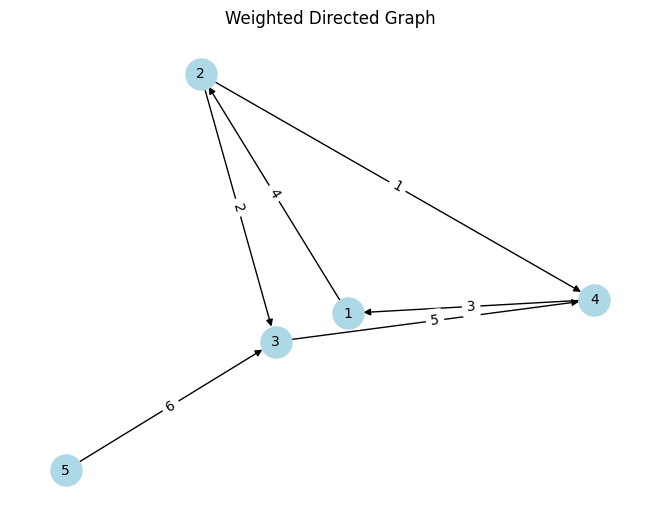

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [1, 2, 3, 4, 5]
G.add_nodes_from(nodes)

# Add multiple weighted edges at once
edges = [(1, 2, {'weight': 4}), (2, 3, {'weight': 2}), (3, 4, {'weight': 5}),
         (4, 1, {'weight': 3}), (2, 4, {'weight': 1}), (5, 3, {'weight': 6})]
G.add_edges_from(edges)

# Compute requested properties
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
all_nodes = list(G.nodes())
degrees = dict(G.degree())  # Total degree (in + out)
out_degrees = dict(G.out_degree())
in_degrees = dict(G.in_degree())
all_edges = list(G.edges(data='weight'))
nodes_from_2 = list(G.successors(2))  # Nodes reachable from vertex 2
adj_list = {node: list(G.successors(node)) for node in G.nodes()}

# Print results
print(f"(i) Total number of nodes: {total_nodes}")
print(f"(ii) Total number of edges: {total_edges}")
print(f"(iii) List of all nodes: {all_nodes}")
print("(iv) Degree of all nodes (in-degree + out-degree):")
for node, degree in degrees.items():
    print(f"    Node {node}: Total Degree = {degree} (In-degree = {in_degrees[node]}, Out-degree = {out_degrees[node]})")
print(f"(v) List of all edges (with weights): {all_edges}")
print(f"(vi) List of all nodes from vertex '2': {nodes_from_2}")
print("(vii) Adjacency List for the Graph G:")
for node, neighbors in adj_list.items():
    print(f"    Node {node}: {neighbors}")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Directed Graph")
plt.show()

#### 1.5 Create and draw a undirected multigraph with labeled nodes and weighted edges, by adding two or more edges with weights at the same time and find

1.   Total no. of nodes.
2.   Total no. of edges.
3.   List of all nodes.
4.   Degree of all nodes.
5.   List of all edges.
6.   List of all nodes from a vertex 'b'.
7.   Adjacency List for the Graph G

(i) Total number of nodes: 5
(ii) Total number of edges: 7
(iii) List of all nodes: ['a', 'b', 'c', 'd', 'e']
(iv) Degree of all nodes:
    Node a: Degree = 3
    Node b: Degree = 4
    Node c: Degree = 3
    Node d: Degree = 3
    Node e: Degree = 1
(v) List of all edges (with weights): [('a', 'b', 4), ('a', 'b', 2), ('a', 'd', 1), ('b', 'c', 3), ('b', 'd', 6), ('c', 'd', 5), ('c', 'e', 2)]
(vi) List of all nodes from vertex 'b': ['a', 'c', 'd']
(vii) Adjacency List for the Graph G:
    Node a: ['b', 'd']
    Node b: ['a', 'c', 'd']
    Node c: ['b', 'd', 'e']
    Node d: ['c', 'a', 'b']
    Node e: ['c']


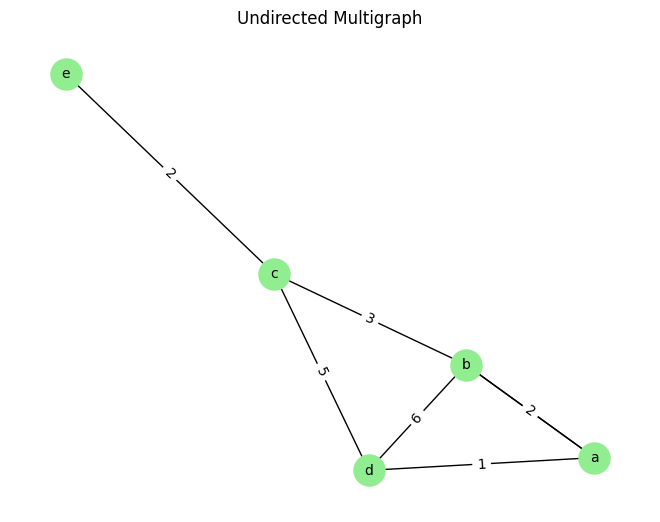

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected multigraph
G = nx.MultiGraph()

# Add nodes
nodes = ['a', 'b', 'c', 'd', 'e']
G.add_nodes_from(nodes)

# Add multiple weighted edges at once
edges = [
    ('a', 'b', {'weight': 4}),
    ('a', 'b', {'weight': 2}),  # Second edge between a and b
    ('b', 'c', {'weight': 3}),
    ('c', 'd', {'weight': 5}),
    ('d', 'a', {'weight': 1}),
    ('b', 'd', {'weight': 6}),
    ('e', 'c', {'weight': 2})
]
G.add_edges_from(edges)

# Compute requested properties
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
all_nodes = list(G.nodes())
degrees = dict(G.degree())  # Degree for undirected multigraph
all_edges = list(G.edges(data='weight'))
nodes_from_b = list(G.neighbors('b'))  # Nodes adjacent to vertex 'b'
adj_list = {node: list(G.neighbors(node)) for node in G.nodes()}

# Print results
print(f"(i) Total number of nodes: {total_nodes}")
print(f"(ii) Total number of edges: {total_edges}")
print(f"(iii) List of all nodes: {all_nodes}")
print("(iv) Degree of all nodes:")
for node, degree in degrees.items():
    print(f"    Node {node}: Degree = {degree}")
print(f"(v) List of all edges (with weights): {all_edges}")
print(f"(vi) List of all nodes from vertex 'b': {nodes_from_b}")
print("(vii) Adjacency List for the Graph G:")
for node, neighbors in adj_list.items():
    print(f"    Node {node}: {neighbors}")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=10)
edge_labels = {edge[:2]: edge[2]['weight'] for edge in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Undirected Multigraph")
plt.show()

#### 1.6 Create and draw a simple undirected graph and display its nodes and edges using dictionary and
1.   Display the edge list
2.   Find the isolated node

Graph representation (using dictionary):
    Node A: ['B', 'C']
    Node B: ['A', 'D']
    Node C: ['A']
    Node D: ['B']
    Node E: []
(i) Edge list: [('A', 'B'), ('A', 'C'), ('B', 'D')]
(ii) Isolated node: ['E']


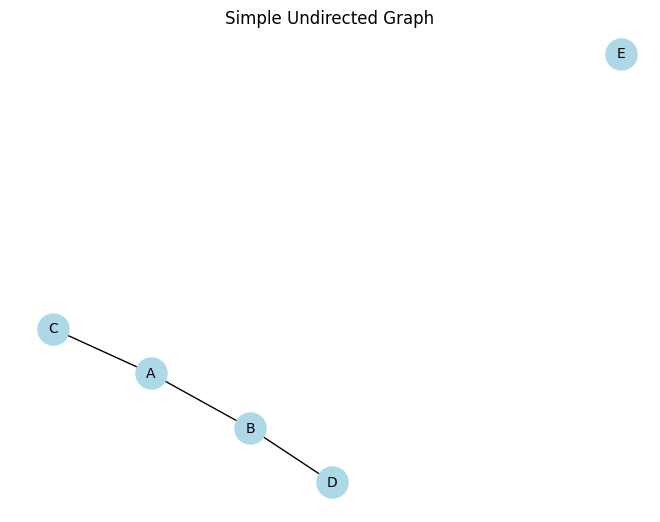

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple undirected graph
G = nx.Graph()

# Define the graph using a dictionary (adjacency list representation)
graph_dict = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B'],
    'E': []  # Isolated node
}

# Add nodes and edges to the graph from the dictionary
for node, neighbors in graph_dict.items():
    G.add_node(node)
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Compute requested properties
edge_list = list(G.edges())
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]

# Print results
print("Graph representation (using dictionary):")
for node, neighbors in graph_dict.items():
    print(f"    Node {node}: {neighbors}")
print(f"(i) Edge list: {edge_list}")
print(f"(ii) Isolated node: {isolated_nodes if isolated_nodes else 'None'}")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Simple Undirected Graph")
plt.show()

#### 1.7 Create and draw (i) Complete graph (ii) Cyclic graph (iii) bipartite graph.

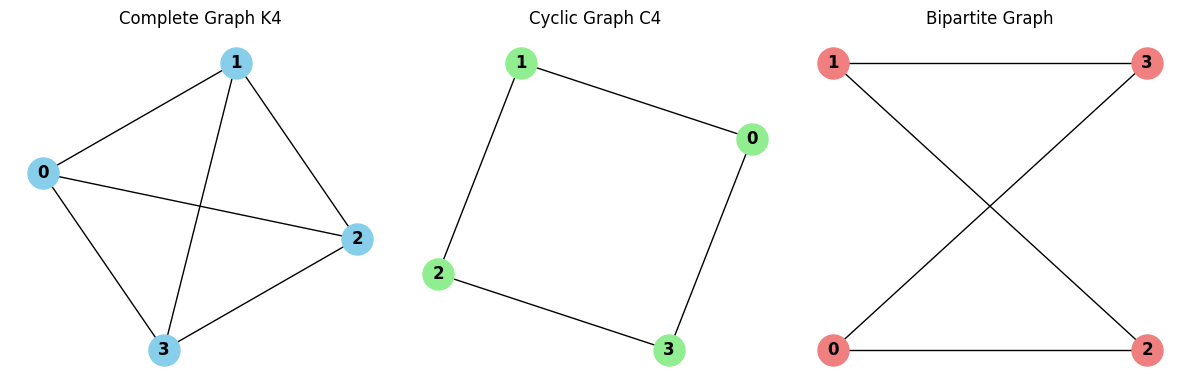

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Complete Graph K4
complete_graph = nx.complete_graph(4)

# 2. Cyclic Graph C4
cycle_graph = nx.cycle_graph(4)

# 3. Bipartite Graph with sets {0, 1} and {2, 3}
bipartite_graph = nx.Graph()
bipartite_graph.add_nodes_from([0, 1], bipartite=0)
bipartite_graph.add_nodes_from([2, 3], bipartite=1)
bipartite_graph.add_edges_from([(0, 2), (0, 3), (1, 2), (1, 3)])

# Drawing the graphs
plt.figure(figsize=(12, 4))

# Plot 1: Complete Graph
plt.subplot(1, 3, 1)
nx.draw(complete_graph, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold')
plt.title("Complete Graph K4")

# Plot 2: Cyclic Graph
plt.subplot(1, 3, 2)
nx.draw(cycle_graph, with_labels=True, node_color='lightgreen', node_size=500, font_weight='bold')
plt.title("Cyclic Graph C4")

# Plot 3: Bipartite Graph
plt.subplot(1, 3, 3)
pos = nx.bipartite_layout(bipartite_graph, nodes=[0, 1])
nx.draw(bipartite_graph, pos, with_labels=True, node_color='lightcoral', node_size=500, font_weight='bold')
plt.title("Bipartite Graph")

plt.tight_layout()
plt.show()


#### ADS_LAB_6_1 – Graphing Algorithms – DRAWING MINIMAL SPANNING TREE USING KRUSKAL AND PRIM'S ALGORITHM Implement Kruskal and Prim's Algorithm for
1.   any cycle G
2.   any random graph.
3.   graphs discussed in class


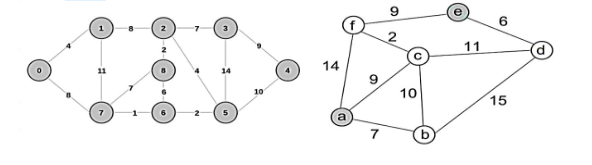

In [17]:
# Union-Find data structure for Kruskal's algorithm
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Path compression
        return self.parent[x]

    def union(self, x, y):
        px, py = self.find(x), self.find(y)
        if px == py:
            return
        if self.rank[px] < self.rank[py]:
            px, py = py, px
        self.parent[py] = px
        if self.rank[px] == self.rank[py]:
            self.rank[px] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

# Kruskal's Algorithm
def kruskal(graph, vertices, vertex_map=None):
    if vertex_map is None:
        vertex_map = {i: i for i in range(len(vertices))}
    edges = []
    for u in vertices:
        for v, weight in graph[u].items():
            if vertex_map[u] < vertex_map[v]:  # Avoid duplicates
                edges.append((weight, u, v))
    edges.sort()  # Sort edges by weight

    uf = UnionFind(len(vertices))
    mst = []
    total_weight = 0

    for weight, u, v in edges:
        u_idx, v_idx = vertex_map[u], vertex_map[v]
        if not uf.connected(u_idx, v_idx):
            uf.union(u_idx, v_idx)
            mst.append((u, v, weight))
            total_weight += weight

    return mst, total_weight

# Prim's Algorithm
def prim(graph, vertices, start_vertex):
    from collections import defaultdict
    import heapq

    mst = []
    total_weight = 0
    visited = set()
    edges = [(weight, start_vertex, to) for to, weight in graph[start_vertex].items()]
    heapq.heapify(edges)
    visited.add(start_vertex)

    while edges and len(visited) < len(vertices):
        weight, u, v = heapq.heappop(edges)
        if v in visited:
            continue
        visited.add(v)
        mst.append((u, v, weight))
        total_weight += weight
        for next_vertex, w in graph[v].items():
            if next_vertex not in visited:
                heapq.heappush(edges, (w, v, next_vertex))

    return mst, total_weight

# Graph 1 from the image (vertices 0 to 4)
graph1 = {
    0: {1: 8, 3: 4, 4: 7},
    1: {0: 8, 2: 7, 4: 14},
    2: {1: 7, 3: 11, 4: 9},
    3: {0: 4, 2: 11, 4: 10},
    4: {0: 7, 1: 14, 2: 9, 3: 10}
}
vertices1 = list(graph1.keys())

# Graph 2 from the image (vertices a to f)
graph2 = {
    'a': {'b': 7, 'c': 9, 'f': 14},
    'b': {'a': 7, 'c': 10, 'd': 15},
    'c': {'a': 9, 'b': 10, 'd': 11, 'f': 2},
    'd': {'b': 15, 'c': 11, 'e': 6},
    'e': {'d': 6, 'f': 9},
    'f': {'a': 14, 'c': 2, 'e': 9}
}
vertices2 = list(graph2.keys())
vertex_map2 = {v: i for i, v in enumerate(vertices2)}

# Run Kruskal's and Prim's on both graphs
print("Graph 1 - Kruskal's Algorithm:")
mst_kruskal1, weight_kruskal1 = kruskal(graph1, vertices1)
print(f"MST: {mst_kruskal1}, Total Weight: {weight_kruskal1}")

print("\nGraph 1 - Prim's Algorithm (starting from vertex 0):")
mst_prim1, weight_prim1 = prim(graph1, vertices1, 0)
print(f"MST: {mst_prim1}, Total Weight: {weight_prim1}")

print("\nGraph 2 - Kruskal's Algorithm:")
mst_kruskal2, weight_kruskal2 = kruskal(graph2, vertices2, vertex_map2)
print(f"MST: {mst_kruskal2}, Total Weight: {weight_kruskal2}")

print("\nGraph 2 - Prim's Algorithm (starting from vertex 'a'):")
mst_prim2, weight_prim2 = prim(graph2, vertices2, 'a')
print(f"MST: {mst_prim2}, Total Weight: {weight_prim2}")

Graph 1 - Kruskal's Algorithm:
MST: [(0, 3, 4), (0, 4, 7), (1, 2, 7), (0, 1, 8)], Total Weight: 26

Graph 1 - Prim's Algorithm (starting from vertex 0):
MST: [(0, 3, 4), (0, 4, 7), (0, 1, 8), (1, 2, 7)], Total Weight: 26

Graph 2 - Kruskal's Algorithm:
MST: [('c', 'f', 2), ('d', 'e', 6), ('a', 'b', 7), ('a', 'c', 9), ('e', 'f', 9)], Total Weight: 33

Graph 2 - Prim's Algorithm (starting from vertex 'a'):
MST: [('a', 'b', 7), ('a', 'c', 9), ('c', 'f', 2), ('f', 'e', 9), ('e', 'd', 6)], Total Weight: 33


#### ADS_LAB_6_2 – Graphing Algorithms – DIJKASTRA SHORTEST PATH ALGORITHM
(a) Implement with the graphs discussed in class as below

(b) Implement it with any arbitrary graph



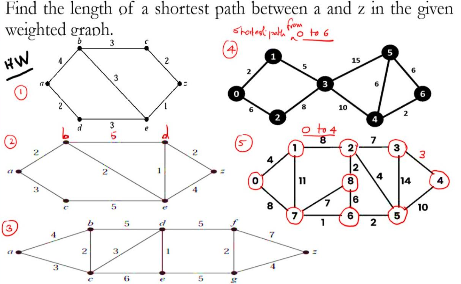

In [20]:
import heapq
from collections import defaultdict

# Dijkstra's Algorithm implementation
def dijkstra(graph, vertices, start, end):
    # Initialize distances and predecessors
    dist = {v: float('inf') for v in vertices}
    dist[start] = 0
    pred = {v: None for v in vertices}
    pq = [(0, start)]
    visited = set()

    while pq:
        d, u = heapq.heappop(pq)
        if u in visited:
            continue
        visited.add(u)

        # If we reached the end vertex, break
        if u == end:
            break

        # Explore neighbors
        for v, weight in graph[u].items():
            if v in visited:
                continue
            new_dist = dist[u] + weight
            if new_dist < dist[v]:
                dist[v] = new_dist
                pred[v] = u
                heapq.heappush(pq, (new_dist, v))

    # Reconstruct the path
    if dist[end] == float('inf'):
        return None, float('inf')  # No path exists

    path = []
    current = end
    while current is not None:
        path.append(current)
        current = pred[current]
    path.reverse()

    return path, dist[end]

# Graph A from the image (vertices 0 to 7, a=0, z=7)
graph_a = {
    0: {1: 1, 2: 5, 3: 13},
    1: {0: 1, 2: 3, 4: 8},
    2: {0: 5, 1: 3, 3: 6, 5: 10},
    3: {0: 13, 2: 6, 5: 3, 6: 14},
    4: {1: 8, 5: 11, 7: 4},
    5: {2: 10, 3: 3, 4: 11, 6: 2, 7: 5},
    6: {3: 14, 5: 2, 7: 10},
    7: {4: 4, 5: 5, 6: 10}
}
vertices_a = list(graph_a.keys())

# Graph B from the image (vertices a to g)
graph_b = {
    'a': {'b': 4, 'd': 1},
    'b': {'a': 4, 'c': 3, 'e': 1},
    'c': {'b': 3, 'f': 5},
    'd': {'a': 1, 'e': 3},
    'e': {'b': 1, 'd': 3, 'f': 1, 'g': 5},
    'f': {'c': 5, 'e': 1, 'g': 2},
    'g': {'e': 5, 'f': 2}
}
vertices_b = list(graph_b.keys())

# Run Dijkstra's on Graph A (from 0 to 7)
path_a, dist_a = dijkstra(graph_a, vertices_a, 0, 7)
print("Graph A - Shortest Path from 0 (a) to 7 (z):")
print(f"Path: {path_a}")
print(f"Length: {dist_a}")

# Run Dijkstra's on Graph B (from 'a' to 'g')
path_b, dist_b = dijkstra(graph_b, vertices_b, 'a', 'g')
print("\nGraph B - Shortest Path from a to g:")
print(f"Path: {path_b}")
print(f"Length: {dist_b}")

# Example for an arbitrary graph (part b)
arbitrary_graph = {
    'x': {'y': 2, 'z': 5},
    'y': {'x': 2, 'z': 1},
    'z': {'x': 5, 'y': 1, 'w': 3},
    'w': {'z': 3}
}
vertices_arbitrary = list(arbitrary_graph.keys())
path_arb, dist_arb = dijkstra(arbitrary_graph, vertices_arbitrary, 'x', 'w')
print("\nArbitrary Graph - Shortest Path from x to w:")
print(f"Path: {path_arb}")
print(f"Length: {dist_arb}")

Graph A - Shortest Path from 0 (a) to 7 (z):
Path: [0, 1, 4, 7]
Length: 13

Graph B - Shortest Path from a to g:
Path: ['a', 'd', 'e', 'f', 'g']
Length: 7

Arbitrary Graph - Shortest Path from x to w:
Path: ['x', 'y', 'z', 'w']
Length: 6


## ADS_LAB_7_1: Simple Union-Find without optimization
Q.1 Create 5 disjoint sets and demonstrate how Simple Union-Find without optimization happens and display the final root for each node.

In [5]:
# Simple Union-Find without optimization
class SimpleUnionFind:
    def __init__(self, size):
        self.parent = list(range(size))  # Each node starts as its own parent

    def find(self, x):
        # Traverse up to find the root
        while self.parent[x] != x:
            x = self.parent[x]
        return x

    def union(self, x, y):
        # Find roots of x and y
        root_x = self.find(x)
        root_y = self.find(y)
        # Make one root the parent of the other
        if root_x != root_y:
            self.parent[root_y] = root_x

    def display(self):
        # Display the parent array and root for each node
        print("Node | Parent | Root")
        for i in range(len(self.parent)):
            print(f"  {i}  |   {self.parent[i]}   |   {self.find(i)}")

# Demonstration of Simple Union-Find
def demonstrate_union_find():
    # Create 5 disjoint sets (nodes 0 to 4)
    uf = SimpleUnionFind(5)
    print("Initial disjoint sets:")
    uf.display()

    # Perform union operations
    print("\nPerforming unions: (0,1), (2,3), (3,4), (1,4)")
    uf.union(0, 1)
    uf.union(2, 3)
    uf.union(3, 4)
    uf.union(1, 4)

    # Display final roots
    print("\nFinal state with roots for each node:")
    uf.display()

if __name__ == "__main__":
    demonstrate_union_find()

Initial disjoint sets:
Node | Parent | Root
  0  |   0   |   0
  1  |   1   |   1
  2  |   2   |   2
  3  |   3   |   3
  4  |   4   |   4

Performing unions: (0,1), (2,3), (3,4), (1,4)

Final state with roots for each node:
Node | Parent | Root
  0  |   0   |   0
  1  |   0   |   0
  2  |   0   |   0
  3  |   2   |   0
  4  |   2   |   0


## ADS_LAB_7_2: Smart Union-Find without optimization
Q.1 Create 5 disjoint sets and demonstrate how Smart Union-Find without optimization happens and display the final root for each node

In [6]:
# Smart Union-Find without optimization
class SmartUnionFind:
    def __init__(self, size):
        self.parent = list(range(size))  # Each node starts as its own parent
        self.size = [1] * size  # Track size of each set for smarter union

    def find(self, x):
        # Traverse up to find the root
        while self.parent[x] != x:
            x = self.parent[x]
        return x

    def union(self, x, y):
        # Find roots of x and y
        root_x = self.find(x)
        root_y = self.find(y)
        # Avoid redundant union if already in same set
        if root_x != root_y:
            # Smart union: Attach smaller set to larger set's root
            if self.size[root_x] < self.size[root_y]:
                root_x, root_y = root_y, root_x  # Swap to attach smaller to larger
            self.parent[root_y] = root_x
            self.size[root_x] += self.size[root_y]  # Update size

    def display(self):
        # Display the parent array, size, and root for each node
        print("Node | Parent | Size | Root")
        for i in range(len(self.parent)):
            print(f"  {i}  |   {self.parent[i]}   |   {self.size[i]}   |   {self.find(i)}")

# Demonstration of Smart Union-Find
def demonstrate_smart_union_find():
    # Create 5 disjoint sets (nodes 0 to 4)
    uf = SmartUnionFind(5)
    print("Initial disjoint sets:")
    uf.display()

    # Perform union operations
    print("\nPerforming unions: (0,1), (2,3), (3,4), (1,4)")
    uf.union(0, 1)
    uf.union(2, 3)
    uf.union(3, 4)
    uf.union(1, 4)

    # Display final roots
    print("\nFinal state with roots for each node:")
    uf.display()

if __name__ == "__main__":
    demonstrate_smart_union_find()

Initial disjoint sets:
Node | Parent | Size | Root
  0  |   0   |   1   |   0
  1  |   1   |   1   |   1
  2  |   2   |   1   |   2
  3  |   3   |   1   |   3
  4  |   4   |   1   |   4

Performing unions: (0,1), (2,3), (3,4), (1,4)

Final state with roots for each node:
Node | Parent | Size | Root
  0  |   2   |   2   |   2
  1  |   0   |   1   |   2
  2  |   2   |   5   |   2
  3  |   2   |   1   |   2
  4  |   2   |   1   |   2


## ADS_LAB_8: String – Pattern Matching Algorithms
Take a text and a string pattern and demonstrate the working of following Algorithms
1. Naive String Matching Algorithm
2. Rabin-Karp Algorithm
3. The Knuth-Morris-Pratt (KMP) Algorithm

In [4]:
# Naive String Matching Algorithm
def naive_string_matching(text, pattern):
    matches = []
    n, m = len(text), len(pattern)
    for i in range(n - m + 1):
        j = 0
        while j < m and text[i + j] == pattern[j]:
            j += 1
        if j == m:
            matches.append(i)
    return matches

# Rabin-Karp Algorithm
def rabin_karp(text, pattern, q=101):  # q is a prime number for modulo
    matches = []
    n, m = len(text), len(pattern)
    if m == 0 or m > n:
        return matches

    # Calculate hash value for pattern and first window of text
    d = 256  # Number of characters in input alphabet
    h = pow(d, m-1) % q  # For removing leading digit
    pattern_hash = 0
    window_hash = 0

    # Initial hash values
    for i in range(m):
        pattern_hash = (d * pattern_hash + ord(pattern[i])) % q
        window_hash = (d * window_hash + ord(text[i])) % q

    # Slide pattern over text
    for i in range(n - m + 1):
        if pattern_hash == window_hash:
            # Check character by character
            for j in range(m):
                if pattern[j] != text[i + j]:
                    break
            else:
                matches.append(i)

        # Calculate hash for next window
        if i < n - m:
            window_hash = (d * (window_hash - ord(text[i]) * h) + ord(text[i + m])) % q
            if window_hash < 0:
                window_hash += q

    return matches

# Knuth-Morris-Pratt (KMP) Algorithm
def kmp(text, pattern):
    matches = []
    n, m = len(text), len(pattern)
    if m == 0 or m > n:
        return matches

    # Compute Longest Prefix Suffix (LPS) array
    def compute_lps(pattern):
        lps = [0] * m
        length = 0
        i = 1
        while i < m:
            if pattern[i] == pattern[length]:
                length += 1
                lps[i] = length
                i += 1
            else:
                if length != 0:
                    length = lps[length - 1]
                else:
                    lps[i] = 0
                    i += 1
        return lps

    lps = compute_lps(pattern)
    i = 0  # Index for text
    j = 0  # Index for pattern
    while i < n:
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == m:
            matches.append(i - j)
            j = lps[j - 1]
        elif i < n and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return matches

# Demonstration of String Matching Algorithms
def demonstrate_string_matching():
    text = "AABAACAADAABAAABAA"
    pattern = "AABA"
    print(f"Text: {text}")
    print(f"Pattern: {pattern}")

    # Naive String Matching
    print("\n=== Naive String Matching ===")
    matches = naive_string_matching(text, pattern)
    print(f"Matches found at indices: {matches}")

    # Rabin-Karp Algorithm
    print("\n=== Rabin-Karp Algorithm ===")
    matches = rabin_karp(text, pattern)
    print(f"Matches found at indices: {matches}")

    # KMP Algorithm
    print("\n=== KMP Algorithm ===")
    matches = kmp(text, pattern)
    print(f"Matches found at indices: {matches}")

if __name__ == "__main__":
    demonstrate_string_matching()

Text: AABAACAADAABAAABAA
Pattern: AABA

=== Naive String Matching ===
Matches found at indices: [0, 9, 13]

=== Rabin-Karp Algorithm ===
Matches found at indices: [0, 9, 13]

=== KMP Algorithm ===
Matches found at indices: [0, 9, 13]
